In [239]:
# Install the 'fasttext' library
!pip install fasttext

In [240]:
from gensim.models import KeyedVectors
import numpy as np
import pandas as pd
import fasttext
import matplotlib.pyplot as plt


In [241]:

# Download the pre-trained FastText model (English, 300 dimensions)
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz

# Unzip the downloaded model file
!gzip -d cc.en.300.bin.gz

In [242]:
model = fasttext.load_model('/content/cc.en.300.bin')


In [243]:
data=pd.read_csv('Hindustan_Clean.csv')

In [244]:
data.describe()

,label,word_count,prop_count,noun_count,adj_count,verb_count,stop_count
count,214.00000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,4.28972,11.897196,2.210280,3.635514,0.971963,1.514019,2.780374
std,2.24135,2.162135,1.893326,1.570817,0.913724,0.912763,1.921802
min,1.00000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,10.000000,1.000000,3.000000,0.000000,1.000000,1.000000
50%,4.00000,12.000000,2.000000,3.000000,1.000000,1.000000,3.000000
75%,6.00000,13.000000,3.000000,5.000000,1.000000,2.000000,4.000000
max,8.00000,17.000000,10.000000,9.000000,4.000000,5.000000,11.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7d1650aa7fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d1659fcb160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d164fbba770>],
 'medians': [<matplotlib.lines.Line2D at 0x7d1659fcacb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d1659fcb670>],
 'means': []}

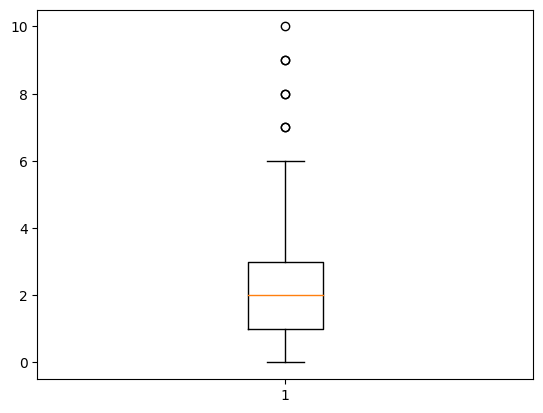

In [245]:
plt.boxplot(data['prop_count'])

In [246]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        def range_(value):
          if (value<lower_limit):
            return lower_limit
          if (value>upper_limit):
            return upper_limit
          else:
            return value

        df[col]=df[col].apply(range_)

    return df

columns_=['prop_count','noun_count','adj_count','verb_count','stop_count']
remove_outliers(data,columns_)

,label,clean_text,word_count,prop_count,noun_count,adj_count,verb_count,stop_count
0,7,stoke to unleash promising spin duo on india a...,15,3.0,4.0,1.0,1.0,5.0
1,7,more than man ganguly s bonafide remark on wom...,14,1.0,6.0,1.0,1.0,4.0
2,7,rohit s chance to make up for wc gavaskar s bi...,15,4.0,3.0,1.0,1.0,5.0
3,7,watch crowd queue up outside shami s house aft...,13,3.0,5.0,0.0,2.0,2.0
4,7,hafeez slams australia for pakistan s warm up ...,14,5.0,2.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...
209,5,indonesia s prambanan temple testimony to indi...,13,6.0,2.0,0.0,0.0,2.0
210,5,mooli for weight loss and immunity 7 benefit 7...,14,0.0,7.0,1.0,1.0,3.0
211,5,we approve crispr gene edit to treat sickle ce...,10,0.0,4.0,1.0,3.0,2.0
212,5,sleep deprivation and vertigo here s how lack ...,13,0.0,5.0,1.0,2.0,5.0


In [247]:
data.head()

,label,clean_text,word_count,prop_count,noun_count,adj_count,verb_count,stop_count
0,7,stoke to unleash promising spin duo on india a...,15,3.0,4.0,1.0,1.0,5.0
1,7,more than man ganguly s bonafide remark on wom...,14,1.0,6.0,1.0,1.0,4.0
2,7,rohit s chance to make up for wc gavaskar s bi...,15,4.0,3.0,1.0,1.0,5.0
3,7,watch crowd queue up outside shami s house aft...,13,3.0,5.0,0.0,2.0,2.0
4,7,hafeez slams australia for pakistan s warm up ...,14,5.0,2.0,2.0,1.0,3.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7d165d2c99f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d165d2ca7d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d164fc13040>],
 'medians': [<matplotlib.lines.Line2D at 0x7d165d2c84c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d165d2c8ee0>],
 'means': []}

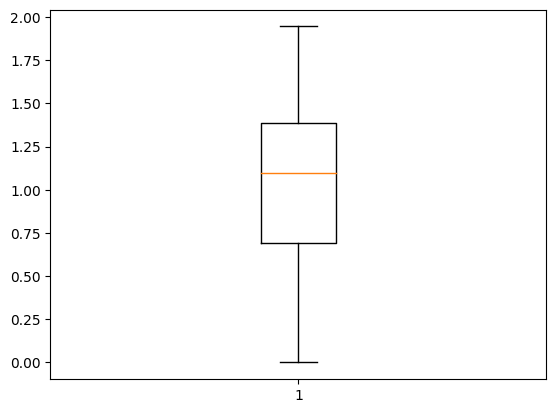

In [278]:
plt.boxplot(data['prop_count'])

In [248]:
data.describe()

,label,word_count,prop_count,noun_count,adj_count,verb_count,stop_count
count,214.00000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,4.28972,11.897196,2.135514,3.630841,0.927570,1.497664,2.768692
std,2.24135,2.162135,1.674260,1.556203,0.808196,0.867376,1.878717
min,1.00000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,10.000000,1.000000,3.000000,0.000000,1.000000,1.000000
50%,4.00000,12.000000,2.000000,3.000000,1.000000,1.000000,3.000000
75%,6.00000,13.000000,3.000000,5.000000,1.000000,2.000000,4.000000
max,8.00000,17.000000,6.000000,8.000000,2.500000,3.500000,8.500000


In [249]:
data.columns

Index(['label', 'clean_text', 'word_count', 'prop_count', 'noun_count',
       'adj_count', 'verb_count', 'stop_count'],
      dtype='object')

In [250]:
data['adj_count']=np.log1p(data['adj_count'])
data['prop_count']=np.log1p(data['prop_count'])
data['noun_count']=np.log1p(data['noun_count'])
data['verb_count']=np.log1p(data['verb_count'])
data['stop_count']=np.log1p(data['stop_count'])

In [251]:
def text_to_vector(text, model):
    words = text.split()
    vectors = [model.get_word_vector(word) for word in words]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.get_dimension())

# Apply the function to the 'text' column and create a new 'vector' column
data['vector'] = data['clean_text'].apply(lambda x: text_to_vector(x, model))

# Display the DataFrame with the added 'vector' column
data

,label,clean_text,word_count,prop_count,noun_count,adj_count,verb_count,stop_count,vector
0,7,stoke to unleash promising spin duo on india a...,15,1.386294,1.609438,0.693147,0.693147,1.791759,"[-0.03186153, 0.02452956, -0.0013218527, 0.044..."
1,7,more than man ganguly s bonafide remark on wom...,14,0.693147,1.945910,0.693147,0.693147,1.609438,"[0.016472137, 0.0064482084, -0.04375116, 0.013..."
2,7,rohit s chance to make up for wc gavaskar s bi...,15,1.609438,1.386294,0.693147,0.693147,1.791759,"[-0.016047304, -0.15304023, -0.109592676, 0.01..."
3,7,watch crowd queue up outside shami s house aft...,13,1.386294,1.791759,0.000000,1.098612,1.098612,"[-0.007804531, -0.0876125, -0.04109135, 0.0477..."
4,7,hafeez slams australia for pakistan s warm up ...,14,1.791759,1.098612,1.098612,0.693147,1.386294,"[-0.007837653, -0.13680357, -0.04498983, 0.023..."
...,...,...,...,...,...,...,...,...,...
209,5,indonesia s prambanan temple testimony to indi...,13,1.945910,1.098612,0.000000,0.000000,1.098612,"[-0.017481068, -0.0429005, -0.05866003, -0.011..."
210,5,mooli for weight loss and immunity 7 benefit 7...,14,0.000000,2.079442,0.693147,0.693147,1.386294,"[-0.004979699, 0.019668344, 0.03689998, -0.006..."
211,5,we approve crispr gene edit to treat sickle ce...,10,0.000000,1.609438,0.693147,1.386294,1.098612,"[0.067356035, 0.02052811, 0.016081484, 0.05782..."
212,5,sleep deprivation and vertigo here s how lack ...,13,0.000000,1.791759,0.693147,1.098612,1.791759,"[-0.018394284, -0.018012427, 0.0015333816, -0...."


In [252]:
np.ndim(data.vector)

1

In [253]:
vector_columns = pd.DataFrame(data['vector'].to_list(), columns=[f'FastText{i}' for i in range(1,301)])
new_data= pd.concat([data, vector_columns], axis=1)

In [254]:
new_data.head()

,label,clean_text,word_count,prop_count,noun_count,adj_count,verb_count,stop_count,vector,FastText1,...,FastText291,FastText292,FastText293,FastText294,FastText295,FastText296,FastText297,FastText298,FastText299,FastText300
0,7,stoke to unleash promising spin duo on india a...,15,1.386294,1.609438,0.693147,0.693147,1.791759,"[-0.03186153, 0.02452956, -0.0013218527, 0.044...",-0.031862,...,0.045964,0.002109,-0.108481,-0.062529,-0.001618,0.030610,0.014262,0.199672,-0.043723,-0.027009
1,7,more than man ganguly s bonafide remark on wom...,14,0.693147,1.945910,0.693147,0.693147,1.609438,"[0.016472137, 0.0064482084, -0.04375116, 0.013...",0.016472,...,0.045847,-0.012616,-0.147013,0.000905,-0.014759,0.020232,-0.005564,0.038581,0.007761,0.016824
2,7,rohit s chance to make up for wc gavaskar s bi...,15,1.609438,1.386294,0.693147,0.693147,1.791759,"[-0.016047304, -0.15304023, -0.109592676, 0.01...",-0.016047,...,0.110236,0.016443,-0.233678,0.093457,-0.016795,-0.019170,0.027564,0.136602,-0.013027,0.016921
3,7,watch crowd queue up outside shami s house aft...,13,1.386294,1.791759,0.000000,1.098612,1.098612,"[-0.007804531, -0.0876125, -0.04109135, 0.0477...",-0.007805,...,0.047368,-0.009170,-0.099289,0.044649,-0.021333,0.035181,0.005717,0.077402,-0.001515,-0.024147
4,7,hafeez slams australia for pakistan s warm up ...,14,1.791759,1.098612,1.098612,0.693147,1.386294,"[-0.007837653, -0.13680357, -0.04498983, 0.023...",-0.007838,...,0.067328,-0.007713,-0.183660,0.029005,-0.020335,-0.002785,-0.018614,0.095559,0.013170,-0.012252


In [255]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Columns: 309 entries, label to FastText300
dtypes: float32(300), float64(5), int64(2), object(2)
memory usage: 266.0+ KB


In [256]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [257]:
X=new_data.drop(['label','word_count','vector','clean_text'],axis=1)

In [258]:
Y=new_data['label']
Y.value_counts()

1    29
2    29
3    29
4    28
5    28
7    26
6    25
8    20
Name: label, dtype: int64

In [259]:
x_train_full,x_test,y_train_full,y_test=train_test_split(X , Y , test_size=0.1, random_state=42)

This is Not The Best Practice But Because Of Small Dataset I want Increase The Training Size Of The Model

In [260]:
# x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full ,test_size=0.1,random_state=42)
x_test_,x_valid,y_test_,y_valid=train_test_split(x_test,y_test ,test_size=0.5,random_state=42)

In [261]:
x_train_full.shape,x_test.shape,y_train_full.shape,y_test.shape

((192, 305), (22, 305), (192,), (22,))

In [262]:
# x_test.shape,x_valid.shape,y_test.shape,y_valid.shape

In [263]:
x_test_.shape,x_valid.shape,y_test_.shape,y_valid.shape

((11, 305), (11, 305), (11,), (11,))

In [264]:
type(x_train_full)

pandas.core.frame.DataFrame

In [265]:
x_train_full.shape[1]

305

In [266]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(x_train_full.shape[1],)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(9, activation='softmax'))

In [267]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 64)                19584     
                                                                 
 dense_45 (Dense)            (None, 32)                2080      
                                                                 
 dense_46 (Dense)            (None, 16)                528       
                                                                 
 dense_47 (Dense)            (None, 9)                 153       
                                                                 
Total params: 22345 (87.29 KB)
Trainable params: 22345 (87.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [268]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [280]:
model.fit(x_train_full,y_train_full, epochs=100, validation_data=(x_valid, y_valid))


Epoch 1/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0141 - accuracy: 0.9896 - val_loss: 3.0721 - val_accuracy: 0.3636
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0118 - accuracy: 0.9948 - val_loss: 2.9020 - val_accuracy: 0.3636
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0171 - accuracy: 0.9948 - val_loss: 2.8411 - val_accuracy: 0.3636
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0130 - accuracy: 0.9948 - val_loss: 3.1716 - val_accuracy: 0.3636
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.9948 - val_loss: 3.1011 - val_accuracy: 0.3636
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0127 - accuracy: 0.9948 - val_loss: 3.0118 - val_accuracy: 0.3636
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0157 - accuracy: 0.9896 - val_loss: 2.7820 - val_accuracy: 0.3636
Epoch 8/100
6/6 [=========

In [281]:
model.evaluate(x_test_, y_test_)


1/1 [==============================] - 0s 20ms/step - loss: 1.5904 - accuracy: 0.7273


[1.590448021888733, 0.7272727489471436]

In [282]:
pred=model.predict(x_test_)

1/1 [==============================] - 0s 16ms/step


In [283]:
pred_labels = np.argmax(pred, axis=1)

In [284]:
len(pred_labels)

11

In [285]:
len(y_test_)

11

In [286]:
pred_labels,y_test_

(array([2, 8, 5, 6, 8, 7, 4, 3, 3, 1, 7]),
 141    2
 45     8
 190    5
 66     6
 144    2
 209    5
 86     4
 182    3
 178    3
 184    3
 15     7
 Name: label, dtype: int64)

In [289]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [291]:
report=classification_report(y_test_,pred_labels)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [293]:
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.50      0.67         2
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         1
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1
           7       0.50      1.00      0.67         1
           8       0.50      1.00      0.67         1

    accuracy                           0.73        11
   macro avg       0.75      0.71      0.68        11
weighted avg       0.91      0.73      0.76        11



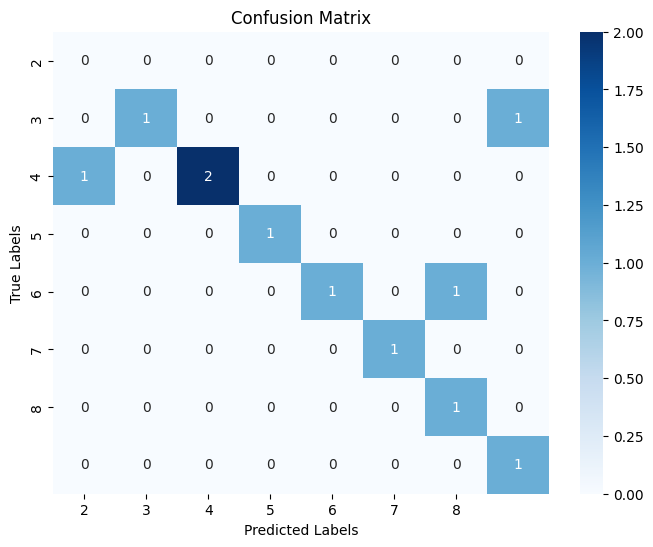

In [288]:
conf_matrix = confusion_matrix(y_test_, pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(pred_labels), yticklabels=np.unique(y_test_))
plt.xlabel('Predicted Labels')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Not Got Best Results Because The Size Of The Data and 8 Classes Among Them That Is Model Trying To Overfit The Data We Getting Good Accuracy On Train Data But Comparatively Not On The Test Data


By Considering The Size Of The Dataset And Classes To Classify It Is Doing Good Job
